In [ ]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;

using Plots
using NPZ

In [12]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed GR_jll ─────────────────────── v0.64.4+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed Measures ───────────────────── v0.3.1
   Installed RelocatableFolders ─────────── v0.1.3
   Installed EarCut_jll ─────────────────── v2.2.3+0
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Contour ────────────────────── v0.5.7
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed RecipesPipeline ────────────── v0.5.2
   Installed PlotUtils ──────────────────── v1.2.0
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed Cairo_jll 

In [8]:
Pkg.instantiate()

   Installed SIMDDualNumbers ────────────────── v0.1.0
   Installed Calculus ───────────────────────── v0.5.1
   Installed TreeViews ──────────────────────── v0.3.0
   Installed OffsetArrays ───────────────────── v1.10.8
   Installed NonlinearSolve ─────────────────── v0.3.16
   Installed StatsFuns ──────────────────────── v0.9.16
   Installed HypergeometricFunctions ────────── v0.3.8
   Installed Preferences ────────────────────── v1.2.5
   Installed PDMats ─────────────────────────── v0.11.7
   Installed DifferentialEquations ──────────── v7.1.0
   Installed DEDataArrays ───────────────────── v0.2.2
   Installed LabelledArrays ─────────────────── v1.8.0
   Installed ZipFile ────────────────────────── v0.9.4
   Installed StaticArrays ───────────────────── v1.4.3
   Installed Formatting ─────────────────────── v0.4.2
   Installed Polyester ──────────────────────── v0.6.7
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed RecursiveArrayTools ────────────── v2.25.1
   

   Installed ResettableStacks ───────────────── v1.1.1
   Installed Requires ───────────────────────── v1.3.0
   Installed ForwardDiff ────────────────────── v0.10.30
   Installed FastBroadcast ──────────────────── v0.1.14
   Installed Distributions ──────────────────── v0.25.53
   Installed RecursiveFactorization ─────────── v0.2.9
   Installed Parameters ─────────────────────── v0.12.3
   Installed SortingAlgorithms ──────────────── v1.0.1
   Installed DensityInterface ───────────────── v0.4.0
   Installed ChangesOfVariables ─────────────── v0.1.2
   Installed SparseDiffTools ────────────────── v1.21.0
   Installed CPUSummary ─────────────────────── v0.1.18
Precompiling project...
  ✓ NaNMath
  ✓ MuladdMacro
  ✓ UnPack
  ✓ PoissonRandom
  ✓ Calculus
  ✓ OrderedCollections
  ✓ DataValueInterfaces
  ✓ Requires
  ✓ FunctionWrappers
  ✓ OpenLibm_jll
  ✓ InvertedIndices
  ✓ PositiveFactorizations
  ✓ Compat
  ✓ Reexport
  ✓ SIMDTypes
  ✓ PDMats
  ✓ Inflate
  ✓ InverseFunctions
  ✓ IfElse


In [10]:
geometry = GSHEIntegrator.setup_geometry(
    rsource=8, θsource=π/2, ϕsource=0,
    robs=50, θobs=0.4π, ϕobs=π,
    a=0.99)

ϵs = (10).^LinRange(-3, -0.5, 100)

geometry.ode_options.no_loops = false
geometry.ode_options.Δθ = 0.000
geometry.ode_options.horizon_tol = 1.001
geometry.ode_options.maxiters = 30000

function spherical_to_shadow(X)
    ψ, ρ = X
    k3 = cos(ψ)
    k2 = sin(ψ) * sin(ρ)
    return [k2, k3]
end

LoadError: UndefVarError: GSHEIntegrator not defined

In [3]:
Xgeo = GSHEIntegrator.find_geodesic_minima(geometry, 2)

LoadError: UndefVarError: GSHEIntegrator not defined

In [49]:
Xgshe = GSHEIntegrator.solve_gshe(Xgeo, geometry, ϵs);

n=1, 1.00%, ϵ=1.00e-03
n=1, 2.00%, ϵ=1.06e-03
n=1, 3.00%, ϵ=1.12e-03
n=1, 4.00%, ϵ=1.19e-03
n=1, 5.00%, ϵ=1.26e-03
n=1, 6.00%, ϵ=1.34e-03
n=1, 7.00%, ϵ=1.42e-03
n=1, 8.00%, ϵ=1.50e-03
n=1, 9.00%, ϵ=1.59e-03
n=1, 10.00%, ϵ=1.69e-03
n=1, 11.00%, ϵ=1.79e-03
n=1, 12.00%, ϵ=1.90e-03
n=1, 13.00%, ϵ=2.01e-03
n=1, 14.00%, ϵ=2.13e-03
n=1, 15.00%, ϵ=2.26e-03
n=1, 16.00%, ϵ=2.39e-03
n=1, 17.00%, ϵ=2.54e-03
n=1, 18.00%, ϵ=2.69e-03
n=1, 19.00%, ϵ=2.85e-03
n=1, 20.00%, ϵ=3.02e-03
n=1, 21.00%, ϵ=3.20e-03
n=1, 22.00%, ϵ=3.39e-03
n=1, 23.00%, ϵ=3.59e-03
n=1, 24.00%, ϵ=3.81e-03
n=1, 25.00%, ϵ=4.04e-03
n=1, 26.00%, ϵ=4.28e-03
n=1, 27.00%, ϵ=4.53e-03
n=1, 28.00%, ϵ=4.81e-03
n=1, 29.00%, ϵ=5.09e-03
n=1, 30.00%, ϵ=5.40e-03
n=1, 31.00%, ϵ=5.72e-03
n=1, 32.00%, ϵ=6.06e-03
n=1, 33.00%, ϵ=6.43e-03
n=1, 34.00%, ϵ=6.81e-03
n=1, 35.00%, ϵ=7.22e-03
n=1, 36.00%, ϵ=7.65e-03
n=1, 37.00%, ϵ=8.11e-03
n=1, 38.00%, ϵ=8.60e-03
n=1, 39.00%, ϵ=9.11e-03
n=1, 40.00%, ϵ=9.66e-03
n=1, 41.00%, ϵ=1.02e-02
n=1, 42.00%, ϵ=1.08e-02
n

In [50]:
geometry.direction_coords = :spherical

:spherical

In [51]:
# Geometric trajectories
Xgeos_cartesian = zeros(2, 3, 250) .* NaN
for i in 1:2
    X = GSHEIntegrator.cartesian_trajectory(Xgeo[i, 1:2], geometry, true)
    n = size(X)[2]
    Xgeos_cartesian[i, :, 1:n] .= X
end
Xgeos_cartesian


# GSHE trajectories
Xgshe_cartesian = zeros(2, 2, 30, 3, 1000) .* NaN
for i in 1:2, s in 1:2, j in 1:30
   X = GSHEIntegrator.cartesian_trajectory(Xgshe[i, s, j, 1:2], geometry, false, ϵs[j], s == 1 ? 2 : -2)
   n = size(X)[2]
   Xgshe_cartesian[i, s, j, :, 1:n] .= X
end



In [5]:
geometry.direction_coords = :shadow
N = 2500
# θs = reverse(acos.(LinRange(-1, 1, N)))
# θs = Vector(LinRange(0, π, N))
# ϕs = Vector(LinRange(0, 2π, N))
k2 = LinRange(-1, 1, N)
k3 = LinRange(-1, 1, N)
loss = GSHEIntegrator.setup_geodesic_loss(geometry);
Z = GSHEIntegrator.grid_evaluate(loss, k2, k3);

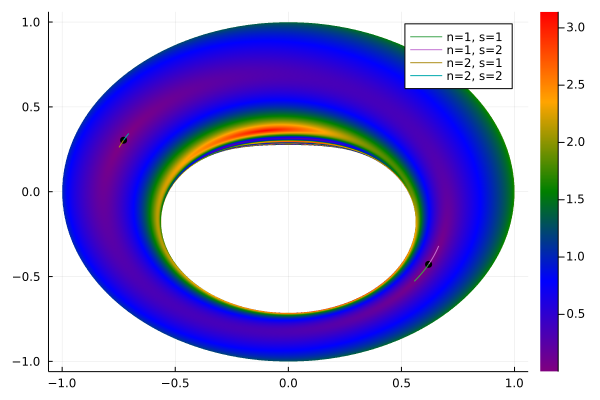

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423


In [6]:

fig = Plots.heatmap(k2, k3, Z, c=:rainbow, dpi=600)

X = mapslices(spherical_to_shadow, Xgeo[:, 1:2], dims=2)
Plots.scatter!(fig, X[:, 1], X[:, 2], c=:black, label=nothing)

for n in 1:2, s in 1:2
    X = mapslices(spherical_to_shadow, Xgshe[n, s, :, 1:2], dims=2)
    Plots.plot!(fig,  X[:, 1], X[:, 2], label="n=$n, s=$s")
end

# Plots.savefig(fig, "~/Downloads/shadow.png")
display(fig)

In [62]:
runID = "03"
coords = zeros(N, 2)
coords[:, 1] = k2
coords[:, 2] = k3


npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Epsilons.npy", ϵs)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_dataZ.npy", Z)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_dataCoords.npy", coords)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgeo.npy", Xgeo)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgshe.npy", Xgshe)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgeo_cartesian.npy", Xgeos_cartesian)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgshe_cartesian.npy", Xgshe_cartesian)
open("/Users/richard/Projects/birefringence/data/$(runID)Description.txt", "w") do f
    write(f, "rsource=8, thetasource=0.5pi, phisource=0, robs=50, thetaobs=0.4pi, phiobs=pi, a=0.99")
end

85